In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')
df.sample(5 )

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1080,ham,You tell what happen dont behave like this to ...,NaN,NaN,NaN
566,ham,Oooh bed ridden ey? What are YOU thinking of?,NaN,NaN,NaN
5047,ham,Yeah so basically any time next week you can g...,NaN,NaN,NaN
1775,ham,Did u see what I posted on your Facebook?,NaN,NaN,NaN
3011,ham,Yeah no probs - last night is obviously catchi...,NaN,NaN,NaN


In [ ]:
#steps:-
#1.data cleaning
#2.EDA
#3.text preprocessing
#4.model building
#5.evaluation
#6Improvement
#7 website
# deployment

In [ ]:
df.sample(5)

,v1,v2
1252,ham,Yeah like if it goes like it did with my frien...
5148,ham,K..then come wenever u lik to come and also te...
4651,ham,Where r e meeting tmr?
1237,ham,Is ur paper in e morn or aft tmr?
3977,ham,Reason is if the team budget is available at l...


In [ ]:
# as column names are not appropriate we will change the names
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
#encoding the target for convinience
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()




,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah think goe usf live around though


In [ ]:
# check for null and duplicated values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
#2 EXPLORATORY DATA ANALYSIS

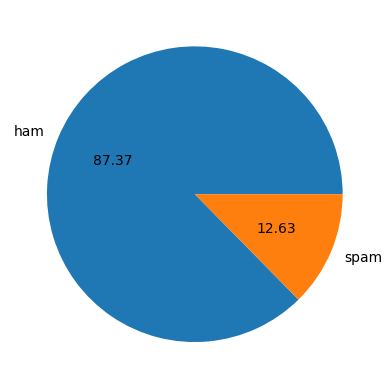

In [ ]:
# lets check how much percentage of sms are spam
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
#finding no of characters,words and sentences in sms for better understanding

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

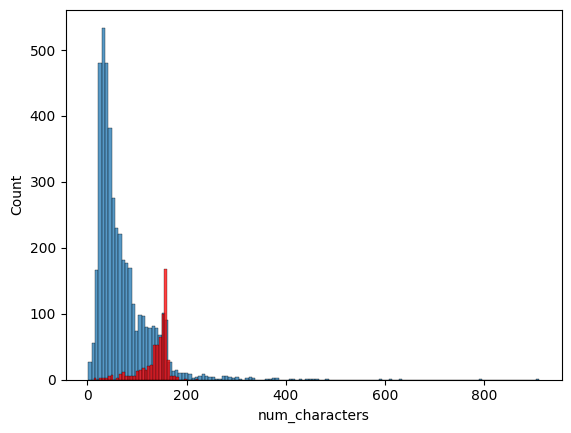

In [ ]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

In [ ]:
# we can clearly see that geneerally spam messages are longer than ham messages

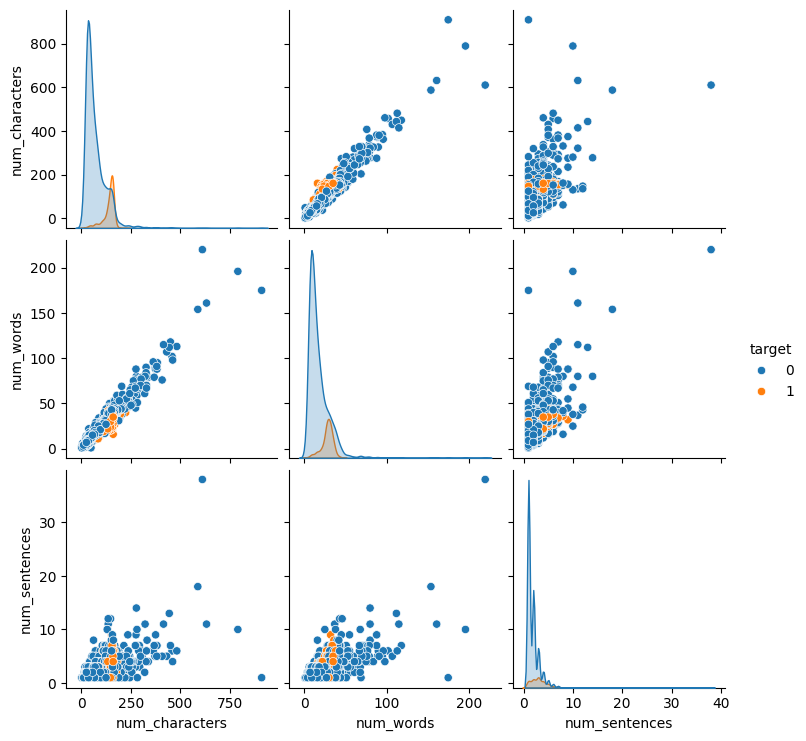

In [ ]:
# To see the relation between the columns of the data
sns.pairplot(df,hue='target')


In [ ]:
#DATA PREPROCESSING[TEXT PREPROCESSING ]
#STEPS:-
#1.Lower case
#2.Tokenization
#3.Removing special characters
#4.Removing stop words and punctuation
#5.Stemming

#... CREATING A SINGLE FUNCTION TO DO ALL THE STEPS......
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords' )


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    # Ensure stopwords are loaded
    nltk_stopwords = set(stopwords.words('english'))

    for i in text:
        if i not in nltk_stopwords and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

df['tranformed_text']=df['text'].apply(transform_text)
df.head()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah think goe usf live around though


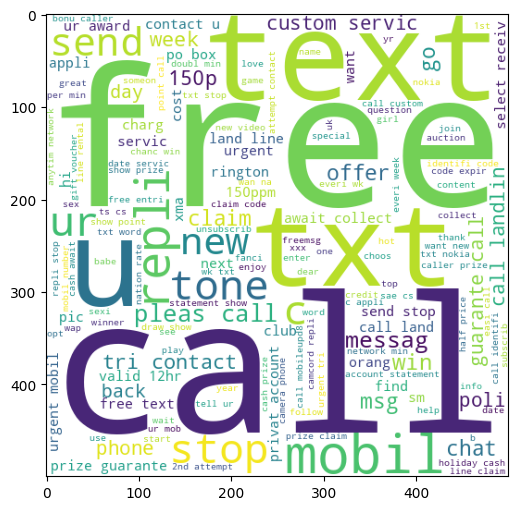

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['tranformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

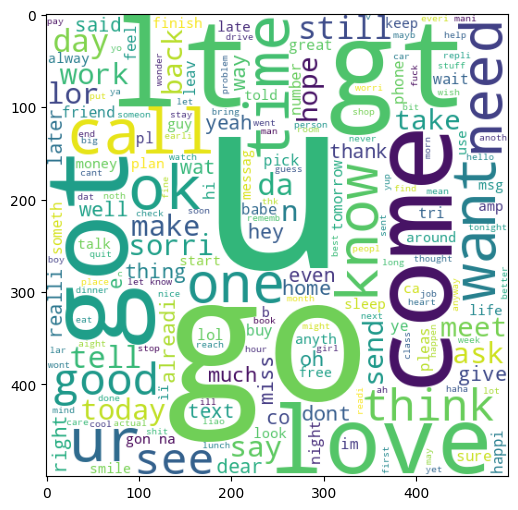

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['tranformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
# To SEE MOST USED WORDS IN SPAM AND HAM SMS
spam_corpus = []
for msg in df[df['target'] == 1]['tranformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


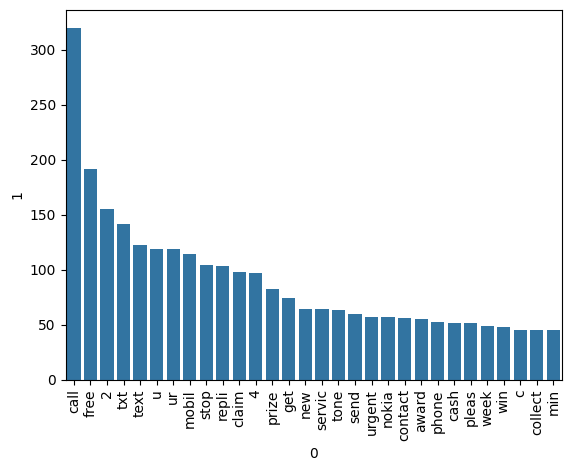

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['tranformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)




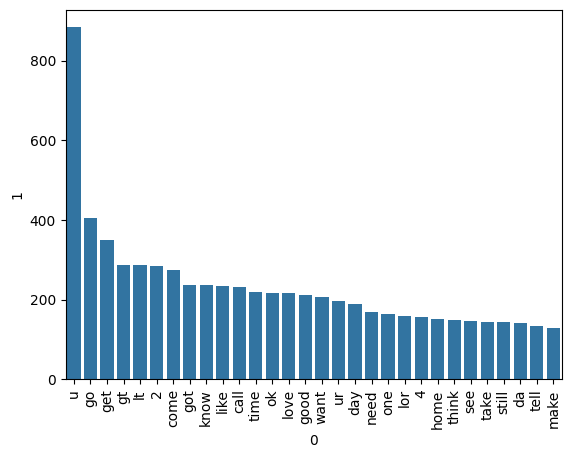

In [ ]:

from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
#MODEl BUILDING

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [ ]:
X=tfidf.fit_transform(df['tranformed_text']).toarray( )
y=df['target'].values
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)



In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()



In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)



(0.9758220502901354, 0.9747899159663865)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8367346938775511
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [ ]:
#DATAFRAME FOR COMPARING ACURACY ,PRECISON FOR DIFFERENT ALGORITHMS

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


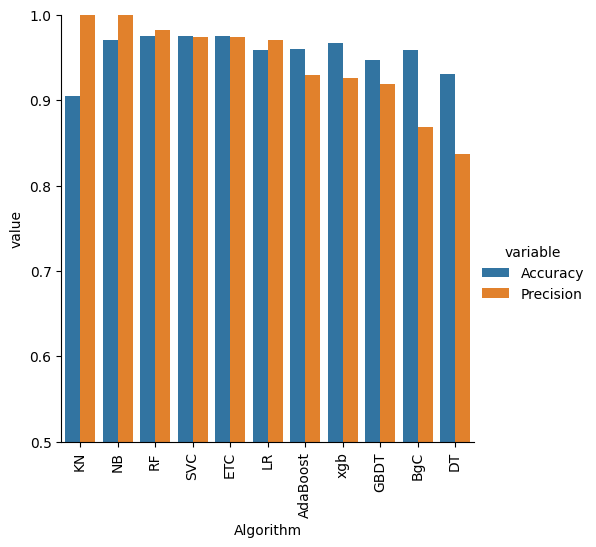

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
#IMPROVING MODEL

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)



VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier


In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))